## Estimating Coin Bias: MLE vs Bayesian Inference

**Goal:**  
Simulate tosses of a biased coin and estimate the hidden bias \( p \) (probability of heads) using both **frequentist** (MLE) and **Bayesian** approaches. Then, visualize how these estimates evolve as more data comes in.

**Techniques Used:**
- Maximum Likelihood Estimation (MLE)
- Bayesian Inference with Beta Prior
- Rolling estimation & convergence
- Bonus: Confidence intervals

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
p_true = 0.65
tosses = 10000
z = 1.96 # 95% percent interval 

result = np.random.choice([0,1] , tosses, p=[1-p_true, p_true])
#result = np.random.binomial(1, p_true, tosses)   #Alternate method

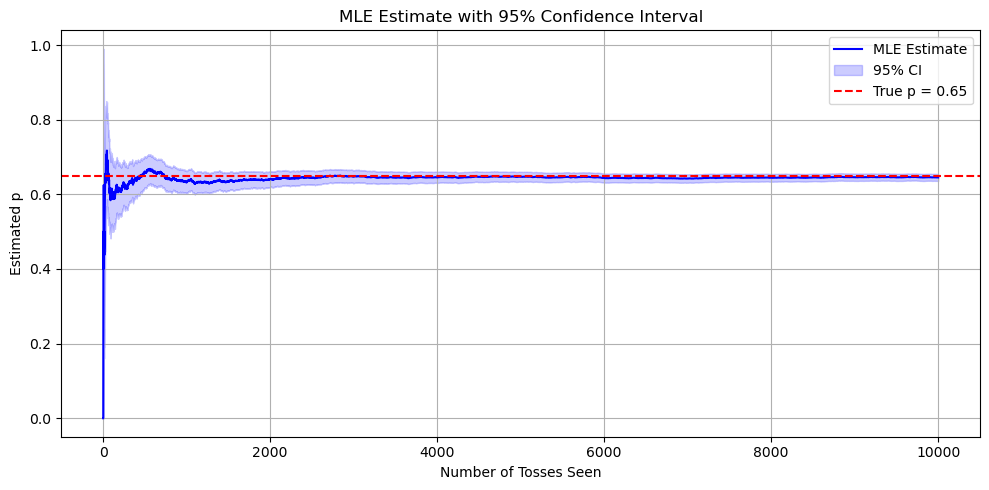

Final rolling estimate by MLE: 0.645


In [27]:
rolling_estimates = []
lower_bounds = []
upper_bounds = []

for i in range(1, len(result) + 1):
    p_hat = np.mean(result[:i])
    se = np.sqrt(p_hat * (1 - p_hat) / i)
    
    ci_lower = max(0, p_hat - z * se)
    ci_upper = min(1, p_hat + z * se)
    
    rolling_estimates.append(p_hat)
    lower_bounds.append(ci_lower)
    upper_bounds.append(ci_upper)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(rolling_estimates, label="MLE Estimate", color='blue')
plt.fill_between(range(1, len(result) + 1), lower_bounds, upper_bounds, color='blue', alpha=0.2, label='95% CI')
plt.axhline(p_true, color='red', linestyle='--', label=f"True p = {p_true}")
plt.xlabel("Number of Tosses Seen")
plt.ylabel("Estimated p")
plt.title("MLE Estimate with 95% Confidence Interval")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Final rolling estimate by MLE: {rolling_estimates[-1]:.3f}")

---

### Bayesian Estimate

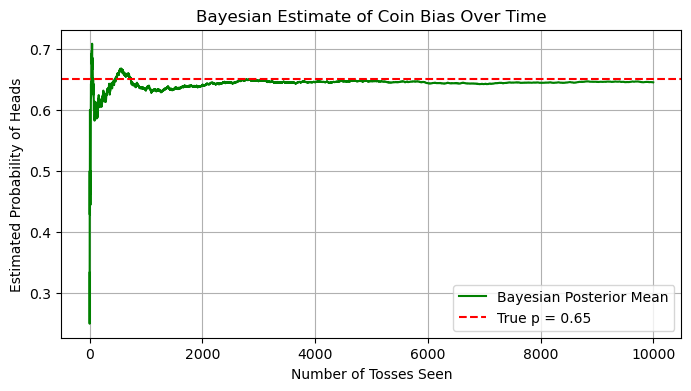

Final rolling estimate by Bayesian Estimate: 0.645


In [25]:
bayes_estimates = []
h, t = 0, 0  # number of heads and tails

for i in range(len(result)):
    if result[i] == 1:
        h += 1
    else:
        t += 1

    alpha = 1 + h
    beta = 1 + t
    estimate = alpha / (alpha + beta)  # Posterior mean
    bayes_estimates.append(estimate)


plt.figure(figsize=(8, 4))
plt.plot(bayes_estimates, label="Bayesian Posterior Mean", color='green')
plt.axhline(p_true, color='red', linestyle='--', label=f"True p = {p_true}")
plt.xlabel("Number of Tosses Seen")
plt.ylabel("Estimated Probability of Heads")
plt.title("Bayesian Estimate of Coin Bias Over Time")
plt.legend()
plt.grid(True)
plt.show()

print(f"Final rolling estimate by Bayesian Estimate: {bayes_estimates[-1]:.3f}")

---

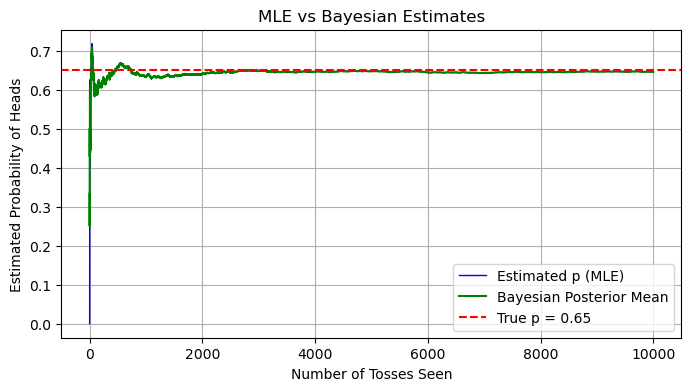

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(rolling_estimates, label="Estimated p (MLE)", color="blue", linewidth=1.0)
plt.plot(bayes_estimates, label="Bayesian Posterior Mean", color='green')
plt.axhline(p_true, color='red', linestyle='--', label=f"True p = {p_true}")
plt.xlabel("Number of Tosses Seen")
plt.ylabel("Estimated Probability of Heads")
plt.title("MLE vs Bayesian Estimates")
plt.legend()
plt.grid(True)
plt.show()